* This notebook was to add jetty in the model based on bathymetry6 and thus create bathymetry 10

In [1]:
from salishsea_tools import (bathy_tools, nc_tools,viz_tools,tidetools)
from IPython.core.display import Image
from __future__ import division, print_function
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

In [3]:
j=[];i=[];points = ['1','2','3'];jnd={};ind={}
for p,q in zip(np.array([18.2,13.7,12])/60, np.array([6.4,8,7.6])/60):
    j.append(-123-p)
    i.append(49+q)

for jj, ii, point in zip(j,i, points):
    [jnd[point],ind[point]] = tidetools.find_closest_model_point(jj,ii,X,Y, bathy)

In [4]:
coords = nc.Dataset('/ocean/jieliu/research/meopar\
/nemo-forcing/grid/coordinates_seagrid_SalishSea.nc', 'r')
lat_f = coords.variables['gphif'][0] #corner grid cell
lon_f = coords.variables['glamf'][0]

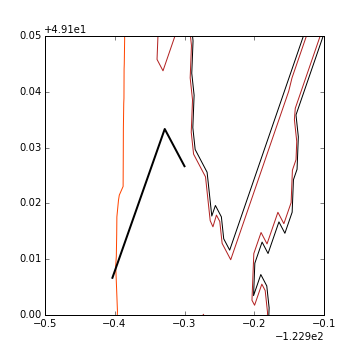

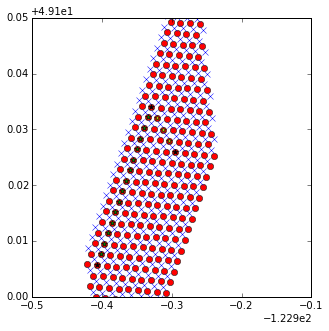

In [5]:
imin = 420; imax=430; jmin = 290; jmax = 320
plt.figure(figsize=(5,5))
plt.plot(lons[imin:imax,jmin:jmax], lats[imin:imax,jmin:jmax], 'or');
plt.plot(lon_f[imin:imax,jmin:jmax], lat_f[imin:imax,jmin:jmax], 'xb')
for point in points:
    plt.plot(lons[jnd[point], ind[point]], lats[jnd[point],ind[point]],'*k')
plt.plot(lons[428,293:307], lats[428,293:307], '*g')
plt.plot(lons[427,308], lats[427,308], '*y')
plt.plot(lons[426,309], lats[426,309], '*y')
plt.plot(lons[425,310], lats[425,310], '*y')
plt.xlim((-123.4, -123.))
plt.ylim(( 49.1, 49.15))
Image('jetty.png')

# Change those grid cells into land

In [6]:
!cp /ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc \
bathy_meter_SalishSea10.nc

In [7]:
bathyy = grid.variables['Bathymetry'][:]

In [8]:
bathy_10 = nc.Dataset('bathy_meter_SalishSea10.nc','r+' )
bathyy_10 = bathy_10.variables['Bathymetry']                                            
lon_10 = bathy_10.variables['nav_lon']
lat_10 = bathy_10.variables['nav_lat']

In [9]:
df = pd.read_csv('jetty.txt', header = None)
for j, i in zip(df[0], df[1]):
    bathyy_10[j,i] = np.ma.masked_values(bathyy_10[j,i],bathyy_10[j,i])

In [10]:
bathy_10.close()